In [1]:
import os

In [2]:
from config import *

In [3]:
from data_load import parse_data_dir

In [4]:
DS1 = DS_bank["reduced"]["DS1"]
print(DS1)

fRecords, fAnnotations = parse_data_dir(DATA_DIR, DS1)
print(len(fRecords))
print(fRecords[:5])
print(fAnnotations[:5])

[101, 106, 108, 109, 112, 115, 118, 119, 201, 203, 205, 207, 208, 209, 215, 220, 223, 230]
18
['101.csv', '106.csv', '108.csv', '109.csv', '112.csv']
['101.txt', '106.txt', '108.txt', '109.txt', '112.txt']


In [5]:
from data_load import load_ecg_from_csv
from utils_ecg import display_signal

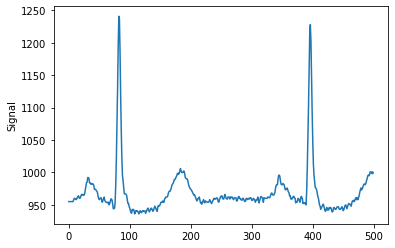

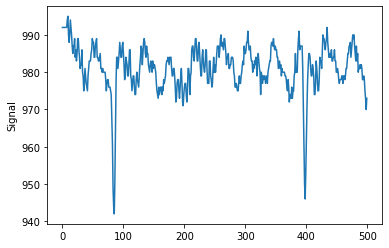

In [6]:
filename = os.path.join(DATA_DIR, fRecords[0])
mlii, v1 = load_ecg_from_csv(filename)

display_signal(mlii[:500])
display_signal(v1[:500])


In [7]:
from data_load import load_ann_from_txt

In [8]:
filename = os.path.join(DATA_DIR, fAnnotations[0])
annotations = load_ann_from_txt(filename)
print(annotations[:10])

[(7, '+'), (83, 'N'), (396, 'N'), (711, 'N'), (1032, 'N'), (1368, 'N'), (1712, 'N'), (2036, 'N'), (2349, 'N'), (2662, 'N')]


In [9]:
from utils_ecg import relocate_r_peak
import matplotlib.pyplot as plt

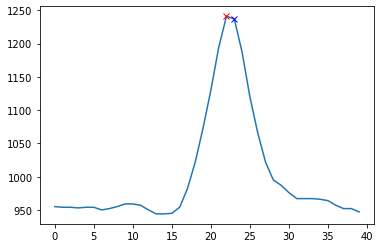

In [10]:
old_r = 83
new_r = relocate_r_peak(old_r, mlii)

plt.plot(mlii[60:100])
plt.plot(old_r-60, mlii[old_r], "xb")
plt.plot(new_r-60, mlii[new_r], "xr")

In [11]:
from utils_ecg import parse_annotations

In [13]:
beat_indices, labels, r_peaks_original, r_peaks, is_r_valid = parse_annotations(annotations, mlii)

print(beat_indices[:5])
print(labels[:5])
print(r_peaks_original[:5])
print(r_peaks[:5])
print(is_r_valid[:5])

[(306, 396, 486), (621, 711, 801), (942, 1032, 1122), (1278, 1368, 1458), (1622, 1712, 1802)]
['N', 'N', 'N', 'N', 'N']
[7, 83, 396, 711, 1032]
[7, 82, 396, 711, 1032]
[False, False, True, True, True]


In [14]:
from utils_ecg import display_beat
import numpy as np

In [15]:
r_peaks_original = np.array(r_peaks_original)[np.array(is_r_valid)]

In [16]:
print([r_pos for _,r_pos, _ in beat_indices][:5])

[396, 711, 1032, 1368, 1712]


In [17]:
print(r_peaks_original[:5])

[ 396  711 1032 1368 1712]


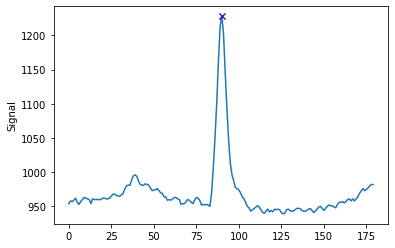

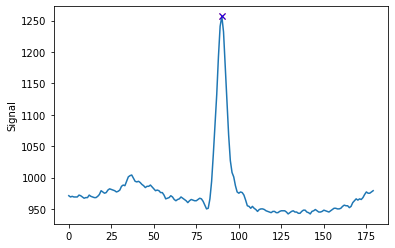

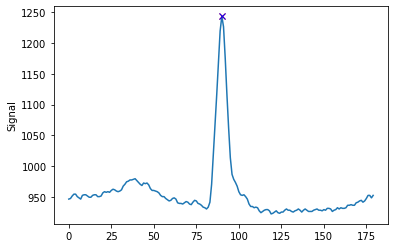

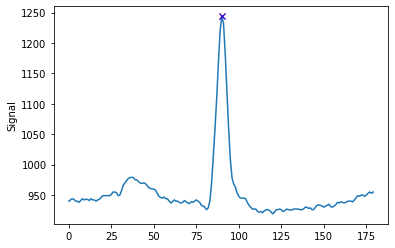

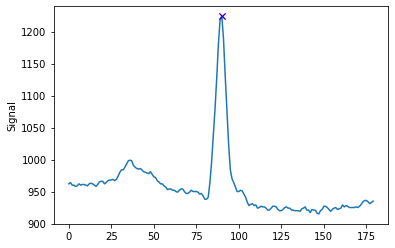

In [18]:
for beat_index, r_pos in zip(beat_indices[:5], r_peaks_original[:5]):
    display_beat(beat_index, mlii, r_pos)

In [19]:
from data_load import load_signals

In [20]:
my_db = load_signals(DS1, (90, 90), False)

100%|██████████| 18/18 [00:06<00:00,  2.68it/s]


In [21]:
import matplotlib.pyplot as plt

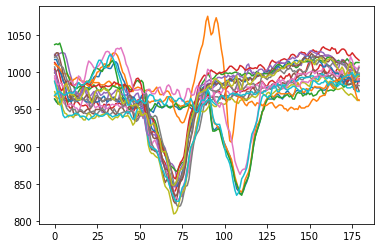

In [22]:
id_record = 2
id_lead = 0
for i in range(20):
    plt.plot(my_db.beat[id_record][i][id_lead])